In [16]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
 
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import keras_metrics as km

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

import numpy as np 
import matplotlib.pyplot as plt 
import argparse
import os
import cv2 
import random
import sys
from PIL import Image
import pickle
import math
import pandas as pd

In [27]:
DATADIR = "./finaldata" 
CATEGORIES = ["Boring", "Interesting"]
training_data = []
feature_extraction_data = []
IMG_SIZE = 20

In [28]:
## Stitch the images together 
## 0 1 2 
## 3 4 5
## 6 7 8

def stitch_images(file_path, file_name):
    images = [Image.open(image) for image in [file_path + "/" + file_name + str(x) + ".png" for x in range(100, 109)]]
    widths, heights = zip(*(i.size for i in images))
    total_width = int(sum(widths) / 3)
    total_height = int(sum(heights) / 3)
    new_image = Image.new("RGB", (total_width, total_height))
    for index in range(0, 9):
        image = images[index]
        new_image.paste(image, ((index % 3) * image.size[0], math.floor(index / 3) * image.size[1]))
    if not os.path.isdir(file_path + "/combined/"):
        os.mkdir(file_path + "/combined/")
    IMAGE_DIR = os.path.join(file_path, "combined/") + file_name + "combined.png"
    new_image.save(IMAGE_DIR)
    return IMAGE_DIR

In [29]:
def create_training_data():
    for category in CATEGORIES: 
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for image in sorted(os.listdir(path)): 
            if "100" not in image or "combined" in image: ## Find the starting frame
                continue
            IMAGE_DIR = stitch_images(path, image[0:-7])
            try: 
                img_array = cv2.imread(IMAGE_DIR, cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                # print(new_array.shape[0], new_array.shape[1])
                feature = np.reshape(new_array, (new_array.shape[0] * new_array.shape[1]))
                training_data.append([new_array, class_num])
                if class_num == 0:
                    feature_extraction_data.append([feature, False])
                else: 
                    feature_extraction_data.append([feature, True])
            except Exception as e: 
                pass 

In [30]:
create_training_data()
random.shuffle(training_data)
random.shuffle(feature_extraction_data)

In [31]:
features_file = open("file.csv", "ab")
feature_data = []
for i in range(len(feature_extraction_data)): 
    row_data = np.append(feature_extraction_data[i][0], feature_extraction_data[i][1])
    feature_data = np.append(feature_data, row_data)

In [32]:
feature_data.shape

(842100,)

In [34]:
feature_data = feature_data.reshape(2100, 401)

In [35]:
df = pd.DataFrame(feature_data)

In [36]:
df.to_csv('features_1600.csv', index=False)  

In [37]:
feature_data[0]

array([255., 149., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 149., 149.,
         0., 149.,   0., 255., 255., 149., 255., 255., 149., 255., 255.,
       255., 255.,   0., 255., 255., 255., 255., 255., 255., 149., 149.,
         0., 255., 255., 255.,   0., 255., 255., 255., 255., 255., 255.,
         0., 255., 255., 255., 255., 255., 255.,   0., 255., 255., 255.,
       255., 255., 255., 255., 255., 149., 255., 255., 255., 255., 255.,
       255., 255.,   0., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255.,   0., 255., 255.,   0.,   0., 255., 255., 255.,
       255., 255., 255.,   0., 255., 255., 255., 14

In [33]:
1892100/2100

901.0

In [38]:
from __future__ import division  # Only for how I'm writing the transition matrix
import networkx as nx  # For the magic
import matplotlib.pyplot as plt  # For plotting

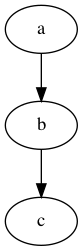

In [41]:
import pygraphviz as pgv
from IPython.display import Image

def draw(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

g1 = """digraph top {
   a -> b -> c;
}"""
draw(g1)

In [40]:
pip install pygraphviz

     |████████████████████████████████| 118 kB 4.6 MB/s eta 0:00:01
  Created wheel for pygraphviz: filename=pygraphviz-1.7-cp37-cp37m-macosx_10_9_x86_64.whl size=101577 sha256=55f7b6b38fd7908a55b1db0a0c2021a507246a7e1bb036723fe958db5c7154ff
  Stored in directory: /Users/liaoqt/Library/Caches/pip/wheels/8c/bc/0c/ac35392b72556e75107ff610cb31b313e8471918a6d280e34c
Successfully built pygraphviz
Note: you may need to restart the kernel to use updated packages.
